# K means

In this notebook, we test our implementation of the k-means algorithm on two datasets: a simple artifical dataset, and the MNIST digits dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch

In [2]:
from kmeans import kmeans

## Testing on a simple artificial dataset

### Creating our artificial dataset

In [3]:
def random2Dpoint(center):
    """
    Returns a random point around center
    """
    return np.random.randn(2) + center

numP = 100
points = [(*random2Dpoint([0,0]),0.) for i in range(numP)] + [(*random2Dpoint([3,3]),1.) for i in range(numP)]
df = pd.DataFrame(points)
df.columns = ['x1','x2','y']
df.head()

,x1,x2,y
0,0.400861,-1.749187,0.0
1,0.127457,-1.268889,0.0
2,-0.070220,-0.130070,0.0
3,-0.571212,0.560552,0.0
4,-1.928875,-0.766473,0.0


Let's plot the dataset.

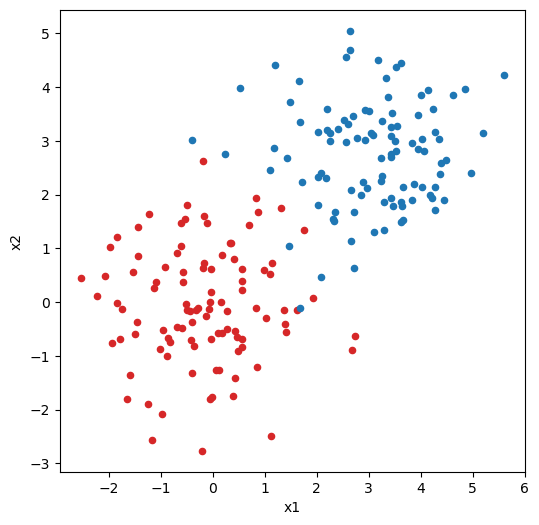

In [4]:
colors = {0. : 'tab:red', 1. : 'tab:blue'}
fig, ax = plt.subplots(figsize=(6, 6))

grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, x='x1', y='x2', kind='scatter', color=colors[key])
plt.show()

For the sake of using the k-means algorithm, we remove the labels from the dataframe.

In [5]:
df_x = df.drop('y',axis=1)

### Testing our implementation

Now we are ready to run the algorithm. We use the standard Euclidean norm to determine distance between points.

In [6]:
learner = kmeans(df_x, k=2)
learner.learn()

4it [00:00, 297.42it/s]


We can predict labels on points like so:

In [7]:
learner.predict(df_x).head()

0    0
1    0
2    0
3    0
4    0
dtype: int64

Since in this case we have the correct labels, we can compute the error rate of the classification (i.e. the percentage of incorrectly classified points). The method accepts a label dataframe Y (containing only values 0,...,k-1) as an argument and automatically deduces how to permute label indices. (Note that depending on the random initialisation in this case, we may need to swap 0 and 1).

In [8]:
Y = df.y
err, perm = learner.accuracy(Y)

In [9]:
print(f'The error rate is {err*100 :.1f}% and the permutation to relate the original labels to the learned ones is {perm}.')

The error rate is 3.5% and the permutation to relate the original labels to the learned ones is (0, 1).


## Testing on the MNIST digits dataset

### Importing the dataset

<Figure size 640x480 with 0 Axes>

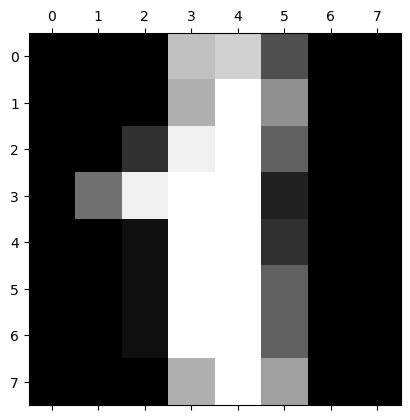

In [10]:
from sklearn.datasets import load_digits

digits = load_digits(as_frame = True)

plt.gray()
plt.matshow(digits.images[1])
plt.show()

### Applying Principal Component Analysis

In [11]:
from sklearn.decomposition import PCA

# Transform the data
pca = PCA(5)
df = pd.DataFrame(pca.fit_transform(digits.data))
# Store the correct labels in Y
Y = digits.target

There should be 10 distinct labels (digits) in our dataset:

In [12]:
len(Y.unique())

10

### Testing our implementation

In [13]:
learner = kmeans(df, k=10)
learner.learn()

16it [00:00, 581.63it/s]


In order to test the accuracy, we need to look at all possible 10! permutations of our labels, in order to find the label permutation that best matches the original labels. This takes a while since 10! ~ 3.6 x 10^6. We activate a progress bar to see how far along we are.

In [14]:
err, perm = learner.accuracy(Y, show_progress_bar = True)

3628800it [12:11, 4958.31it/s]


In [15]:
print(f'The error rate is {err*100 :.1f}% and the permutation to relate the original labels to the learned ones is {perm}.')

The error rate is 33.2% and the permutation to relate the original labels to the learned ones is (5, 6, 3, 7, 1, 4, 2, 0, 8, 9).


Not a very good classification, but the algorithm seems to work.